### GloVe Embeddings



In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense


In [ ]:
# Contoh data teks
texts = [
    "Saya suka cuaca hari ini.",
    "Mobil itu rusak.",
    "Makanan ini enak.",
    "Film itu membosankan.",
    "Pekerjaan rumah sangat melelahkan.",
    "Pertandingan sepak bola sangat seru.",
    "Laptop saya bermasalah.",
    "Saya senang belajar hal baru.",
    "Cuaca di luar sangat panas.",
    "Musik itu sangat menenangkan."
]
labels = [1, 0, 1, 0, 0, 1, 0, 1, 0, 1]  # 1 untuk positif, 0 untuk negatif

In [ ]:
# Tokenisasi teks
tokenizer = Tokenizer()  # texts ditokenisasi dan diubah menjadi urutan token menggunakan Keras Tokenizer.
tokenizer.fit_on_texts(texts)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Konversi teks menjadi urutan token
sequences = tokenizer.texts_to_sequences(texts)

In [ ]:
# Padding urutan agar semua memiliki panjang yang sama
maxlen = 10  # Panjang maksimal teks # Urutan token dipadatkan (padded) agar semua memiliki panjang yang sama (maxlen).
X = pad_sequences(sequences, padding='post', maxlen=maxlen)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-09-26 04:57:06--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-09-26 04:57:06--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-09-26 04:57:06--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np

embedding_dim = 100
embeddings_index = {}
glove_path = '/content/glove.6B.100d.txt'

with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f"Loaded {len(embeddings_index)} word vectors.")

Loaded 400000 word vectors.


In [ ]:
# Memuat pre-trained GloVe embeddings
embedding_dim = 100
embeddings_index = {}
glove_path = '/content/glove.6B.100d.txt'  # File GloVe (glove.6B.100d.txt) dimuat dan disimpan dalam embeddings_index.

with open(glove_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
# Membuat matriks embedding
embedding_matrix = np.zeros((vocab_size, embedding_dim))  # Matriks embedding (embedding_matrix) dibuat dengan ukuran vocab_size x embedding_dim.
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector            # Setiap kata dalam tokenizer word index dicari embeddingnya dalam embeddings_index dan disimpan dalam embedding_matrix.

In [ ]:
# Membangun model dengan pre-trained embeddings
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Melatih model
model.fit(X, np.array(labels), epochs=10, verbose=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7520
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.5000 - loss: 0.6356
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.5744
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7000 - loss: 0.5328
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8000 - loss: 0.4996
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.4680
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.4431
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9000 - loss: 0.4255
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9000 - loss: 0.4089
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8000 - loss: 0.3958


In [ ]:
# Contoh kalimat baru untuk prediksi
test_texts = [                                    # Model digunakan untuk memprediksi sentimen dari kalimat baru.
    "Cuaca hari ini sedang hujan deras.",
    "Mobil itu baru saja rusak.",
    "Makanan ini sangat enak.",
    "Film itu sangat membosankan",
    "Saya senang belajar hal baru.",
    "Musik itu sangat berisik."
]
test_sequences = tokenizer.texts_to_sequences(test_texts)
X_test = pad_sequences(test_sequences, padding='post', maxlen=maxlen)
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


In [ ]:
# Output hasil prediksi
for text, prediction in zip(test_texts, predictions):
    print("Kalimat:", text)
    if prediction > 0.5:
        print("Prediksi: Positif")
    else:
        print("Prediksi: Negatif")
    print()

Kalimat: Cuaca hari ini sedang hujan deras.
Prediksi: Positif

Kalimat: Mobil itu baru saja rusak.
Prediksi: Negatif

Kalimat: Makanan ini sangat enak.
Prediksi: Negatif

Kalimat: Film itu sangat membosankan
Prediksi: Negatif

Kalimat: Saya senang belajar hal baru.
Prediksi: Positif

Kalimat: Musik itu sangat berisik.
Prediksi: Negatif



### Indobert Embeddings dan Visualisasi

In [ ]:
pip install transformers torch numpy matplotlib seaborn scikit-learn

In [ ]:
# Load Model
from transformers import AutoTokenizer, AutoModel
import torch

print("LOAD MODEL")

# 1. Load tokenizer dan model IndoBERT
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = AutoModel.from_pretrained("indobenchmark/indobert-base-p1")

print(f"Tokenizer: {type(tokenizer)}")
print(f"Model: {type(model)}")

# 2. Test dengan satu teks sederhana
text = "Halo dunia Indonesia"
inputs = tokenizer(text, return_tensors='pt')  # 'pt' untuk PyTorch

print(f"\nContoh:")
print(f"Text: '{text}'")
print(f"Tokens: {tokenizer.tokenize(text)}")
print(f"Input IDs: {inputs['input_ids']}")

# 3. Dapatkan embeddings
with torch.no_grad():  # Non-aktifkan gradient untuk inferensi
    outputs = model(**inputs)

print(f"\nOutput shapes:")
print(f"Last hidden state: {outputs.last_hidden_state.shape}")
# Shape: (batch_size, sequence_length, hidden_size)
# Contoh: (1, 5, 768) → 1 teks, 5 tokens, 768 dimensi

LOAD MODEL
Tokenizer: <class 'transformers.models.bert.tokenization_bert_fast.BertTokenizerFast'>
Model: <class 'transformers.models.bert.modeling_bert.BertModel'>

Contoh:
Text: 'Halo dunia Indonesia'
Tokens: ['halo', 'dunia', 'indonesia']
Input IDs: tensor([[   2, 9302,  594,  300,    3]])

Output shapes:
Last hidden state: torch.Size([1, 5, 768])


In [ ]:
# Membuat Matrix Embeddings
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

print("CREATE EMBEDDING")

# 1. Load model
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = AutoModel.from_pretrained("indobenchmark/indobert-base-p1")
model.eval()  # Set ke evaluation mode

# 2. Fungsi untuk membuat embedding dari teks
def create_embedding(text):
    """Buat embedding untuk satu teks"""
    # Tokenisasi
    inputs = tokenizer(
        text,
        return_tensors='pt',
        padding=True,
        truncation=True,
        max_length=512
    )

    # Forward pass
    with torch.no_grad():
        outputs = model(**inputs)

    # Ambil embedding dari token [CLS] (posisi 0)
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    return cls_embedding

def create_embeddings_batch(texts):
    """Buat embeddings untuk beberapa teks sekaligus"""
    embeddings = []
    for text in texts:
        embedding = create_embedding(text)
        embeddings.append(embedding)
        print(f"'{text[:20]}...' → embedding shape: {embedding.shape}")

    return np.array(embeddings)

# 3. Teks contoh
texts = [
    "Saya suka makan nasi goreng",
    "Nasi goreng adalah makanan enak",
    "Indonesia negara yang indah",
    "Bali destinasi wisata populer",
    "Saya belajar pemrograman Python",
    "Python bahasa pemrograman populer"
]

print(f"\nMembuat embeddings untuk {len(texts)} teks:")
embeddings = create_embeddings_batch(texts)

print(f"Shape: {embeddings.shape}")  # (6, 768)
print(f"Artinya: {embeddings.shape[0]} teks × {embeddings.shape[1]} dimensi")

# Simpan untuk step berikutnya
np.save('embeddings.npy', embeddings)
print("Embeddings disimpan sebagai 'embeddings.npy'")

CREATE EMBEDDING

Membuat embeddings untuk 6 teks:
'Saya suka makan nasi...' → embedding shape: (768,)
'Nasi goreng adalah m...' → embedding shape: (768,)
'Indonesia negara yan...' → embedding shape: (768,)
'Bali destinasi wisat...' → embedding shape: (768,)
'Saya belajar pemrogr...' → embedding shape: (768,)
'Python bahasa pemrog...' → embedding shape: (768,)
Shape: (6, 768)
Artinya: 6 teks × 768 dimensi
Embeddings disimpan sebagai 'embeddings.npy'


VISUALIZATION
Embeddings dimuat: shape (6, 768)

1. Membuat PCA Visualization...


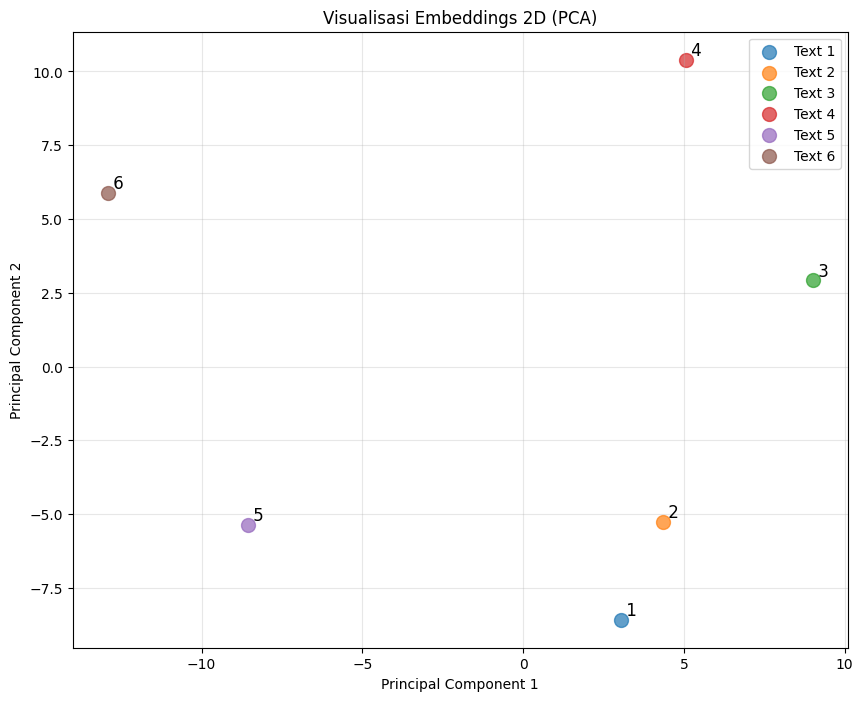


2. Membuat Similarity Heatmap...


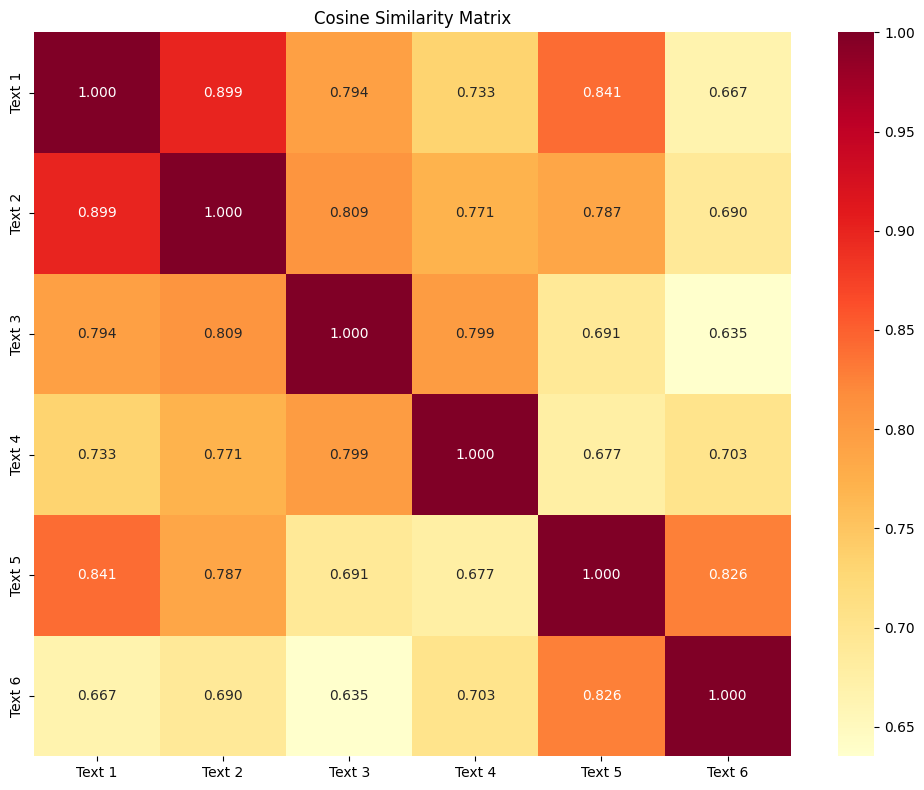


3. Analisis Kemiripan Teks:
Text 1 vs Text 2: 0.899 (TINGGI)
Text 1 vs Text 3: 0.794 (TINGGI)
Text 1 vs Text 4: 0.733 (TINGGI)
Text 1 vs Text 5: 0.841 (TINGGI)
Text 1 vs Text 6: 0.667 (SEDANG)
Text 2 vs Text 3: 0.809 (TINGGI)
Text 2 vs Text 4: 0.771 (TINGGI)
Text 2 vs Text 5: 0.787 (TINGGI)
Text 2 vs Text 6: 0.690 (SEDANG)
Text 3 vs Text 4: 0.799 (TINGGI)
Text 3 vs Text 5: 0.691 (SEDANG)
Text 3 vs Text 6: 0.635 (SEDANG)
Text 4 vs Text 5: 0.677 (SEDANG)
Text 4 vs Text 6: 0.703 (TINGGI)
Text 5 vs Text 6: 0.826 (TINGGI)

VISUALISASI SELESAI!


In [ ]:
# Visualisasi
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

print("VISUALIZATION")

# Load embeddings
try:
    embeddings = np.load('embeddings.npy')
    print(f"Embeddings dimuat: shape {embeddings.shape}")
except:
    print("File embeddings.npy tidak ditemukan. Jalankan step 2 dulu.")
    exit()

# 2. Teks yang sama seperti step 2
texts = [
    "Saya suka makan nasi goreng",
    "Nasi goreng adalah makanan enak",
    "Indonesia negara yang indah",
    "Bali destinasi wisata populer",
    "Saya belajar pemrograman Python",
    "Python bahasa pemrograman populer"
]

# 3. Visualisasi 1: PCA 2D
print("\n1. Membuat PCA Visualization...")
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
for i, (x, y) in enumerate(embeddings_2d):
    plt.scatter(x, y, s=100, alpha=0.7, label=f'Text {i+1}')
    plt.text(x, y, f' {i+1}', fontsize=12, ha='left', va='bottom')

plt.title('Visualisasi Embeddings 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 4. Visualisasi 2: Heatmap Similarity
print("\n2. Membuat Similarity Heatmap...")
similarity_matrix = cosine_similarity(embeddings)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix,
            xticklabels=[f"Text {i+1}" for i in range(len(texts))],
            yticklabels=[f"Text {i+1}" for i in range(len(texts))],
            annot=True, fmt='.3f', cmap='YlOrRd')
plt.title('Cosine Similarity Matrix')
plt.tight_layout()
plt.show()

# 5. Analisis kemiripan
print("\n3. Analisis Kemiripan Teks:")
for i in range(len(texts)):
    for j in range(i+1, len(texts)):
        similarity = similarity_matrix[i, j]
        level = "TINGGI" if similarity > 0.7 else "SEDANG" if similarity > 0.4 else "RENDAH"
        print(f"Text {i+1} vs Text {j+1}: {similarity:.3f} ({level})")

print("\nVISUALISASI SELESAI!")

In [ ]:
# Semantic Search
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

print("SEMANTIC SEARCH")

# 1. Load model dan embeddings
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = AutoModel.from_pretrained("indobenchmark/indobert-base-p1")
model.eval()

embeddings = np.load('embeddings.npy')
texts = [
    "Saya suka makan nasi goreng",
    "Nasi goreng adalah makanan enak",
    "Indonesia negara yang indah",
    "Bali destinasi wisata populer",
    "Saya belajar pemrograman Python",
    "Python bahasa pemrograman populer"
]

def semantic_search(query, top_k=3):
    """Cari teks paling mirip dengan query"""
    print(f"\nMencari: '{query}'")

    # Buat embedding untuk query
    inputs = tokenizer(query, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)

    query_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()

    # Hitung similarity dengan semua teks
    similarities = cosine_similarity([query_embedding], embeddings)[0]

    # Dapatkan indeks paling mirip
    most_similar_indices = similarities.argsort()[-top_k:][::-1]

    print("Hasil Pencarian:")
    for rank, idx in enumerate(most_similar_indices, 1):
        print(f"{rank}. {texts[idx]} (similarity: {similarities[idx]:.3f})")

    return most_similar_indices

# 2. Test semantic search
queries = [
    "makanan enak",
    "tempat wisata",
    "bahasa komputer",
    "negara Asia"
]

for query in queries:
    semantic_search(query)
    print("-" * 50)

SEMANTIC SEARCH

Mencari: 'makanan enak'
Hasil Pencarian:
1. Saya suka makan nasi goreng (similarity: 0.810)
2. Nasi goreng adalah makanan enak (similarity: 0.790)
3. Indonesia negara yang indah (similarity: 0.759)
--------------------------------------------------

Mencari: 'tempat wisata'
Hasil Pencarian:
1. Bali destinasi wisata populer (similarity: 0.847)
2. Indonesia negara yang indah (similarity: 0.761)
3. Saya suka makan nasi goreng (similarity: 0.736)
--------------------------------------------------

Mencari: 'bahasa komputer'
Hasil Pencarian:
1. Python bahasa pemrograman populer (similarity: 0.824)
2. Saya belajar pemrograman Python (similarity: 0.691)
3. Bali destinasi wisata populer (similarity: 0.689)
--------------------------------------------------

Mencari: 'negara Asia'
Hasil Pencarian:
1. Indonesia negara yang indah (similarity: 0.744)
2. Bali destinasi wisata populer (similarity: 0.701)
3. Python bahasa pemrograman populer (similarity: 0.648)
----------------------